# Deteccion y Comparacion de Fuentes de las imagenes obtenidas con PhoSim

### Por Sergio Daniel Hernandez Charpak

## Deteccion de Fuentes sobre las imagenes simuladas

In [1]:
%pylab inline
import sep #http://sep.readthedocs.org/
import os 
from astropy.io import fits
import glob

Populating the interactive namespace from numpy and matplotlib


In [2]:
path_imagenes = '../../PruebaImagenes/w13_diffim_v11/calexp/v6866601-fi/R22/'

In [3]:
#pha_list = fits.open('../../PruebaImagenes/w13_diffim_v11/src/v6866602-fi/R22/S11.fits')
pha_list = fits.open('../../PruebaImagenes/w13_diffim_v11/calexp/v6866601-fi/R22/S20.fits')
pha_list.info()

Filename: ../../PruebaImagenes/w13_diffim_v11/calexp/v6866601-fi/R22/S20.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     347   ()              
1                ImageHDU        33   (4000, 4072)   float32   
2                ImageHDU        44   (4000, 4072)   int16   
3                ImageHDU        33   (4000, 4072)   float32   
4                BinTableHDU     40   16R x 7C     [1J, 1J, 1J, 1J, 1J, 64A, 64A]   
5                BinTableHDU     20   4R x 2C      [64A, 1J]   
6                BinTableHDU     41   2R x 6C      [1J, 1J, 1J, 1J, 1J, 9D]   
7                BinTableHDU     41   2R x 6C      [1J, 1J, 1J, 1J, 1J, 1D]   
8                BinTableHDU     26   1R x 3C      [1J, 1D, 1D]   
9                BinTableHDU     40   1R x 6C      [1J, 1J, 1J, 1J, 4J, 4J]   
10               BinTableHDU     39   4R x 5C      [6D, 1D, 1D, 1D, 1D]   
11               BinTableHDU     39   4R x 5C      [1J, 1J, 1J, 1J, 625D]   
12            

In [4]:
pha_data_4=pha_list[4].data
#columnas
print pha_list[12].columns

ColDefs(
    name = 'crval_x'; format = '1D'; unit = 'degrees'
    name = 'crval_y'; format = '1D'; unit = 'degrees'
    name = 'crpix_x'; format = '1D'; unit = 'pixels'
    name = 'crpix_y'; format = '1D'; unit = 'pixels'
    name = 'cd'; format = '4D'
    name = 'ctype1'; format = '72A'
    name = 'ctype2'; format = '72A'
    name = 'equinox'; format = '1D'
    name = 'radesys'; format = '72A'
    name = 'cunit1'; format = '72A'
    name = 'cunit2'; format = '72A'
)


In [5]:
pha_data_1 = pha_list[1].data
print shape(pha_data_1)

(4072, 4000)


<matplotlib.colorbar.Colorbar instance at 0x7fcbb018c998>

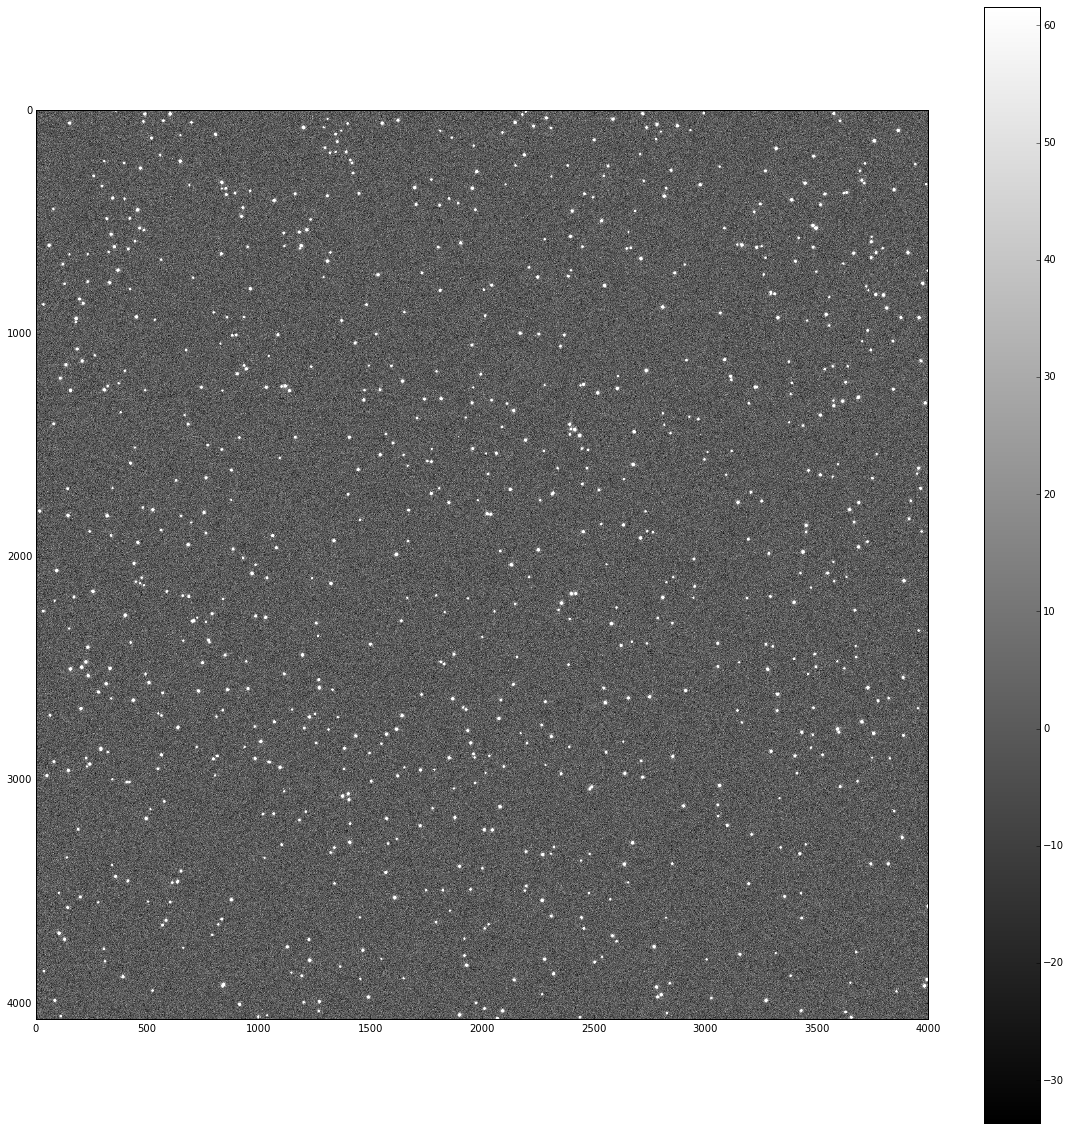

In [6]:
figure(figsize = (20,20))
imshow(pha_data_1, cmap='gray', vmin=-33.627594,vmax=61.58709)
colorbar()

In [7]:
data=pha_data_1
shape_data=shape(data)

In [8]:
#Background
try:
    bkg = sep.Background(data)
except ValueError:
    data = data.byteswap().newbyteorder()
    bkg = sep.Background(data)

In [9]:
#Source detection

thresh = 2.0 * bkg.globalrms
objects = sep.extract(data, thresh) # objects is a numpy structured array

num_objects = len(objects)
print num_objects # number of objects

851


In [10]:
#Objetos Resultados
print(objects.dtype.names)

('thresh', 'npix', 'tnpix', 'xmin', 'xmax', 'ymin', 'ymax', 'x', 'y', 'x2', 'y2', 'xy', 'a', 'b', 'theta', 'cxx', 'cyy', 'cxy', 'cflux', 'flux', 'cpeak', 'peak', 'xcpeak', 'ycpeak', 'xpeak', 'ypeak', 'flag')


In [11]:
objects_x = []
objects_y = []

for i in range(num_objects):
    x = objects['x'][i]
    y = objects['y'][i]
    
    objects_x.append(x)
    objects_y.append(y)
    
objects_x = array(objects_x)
objects_y = array(objects_y)

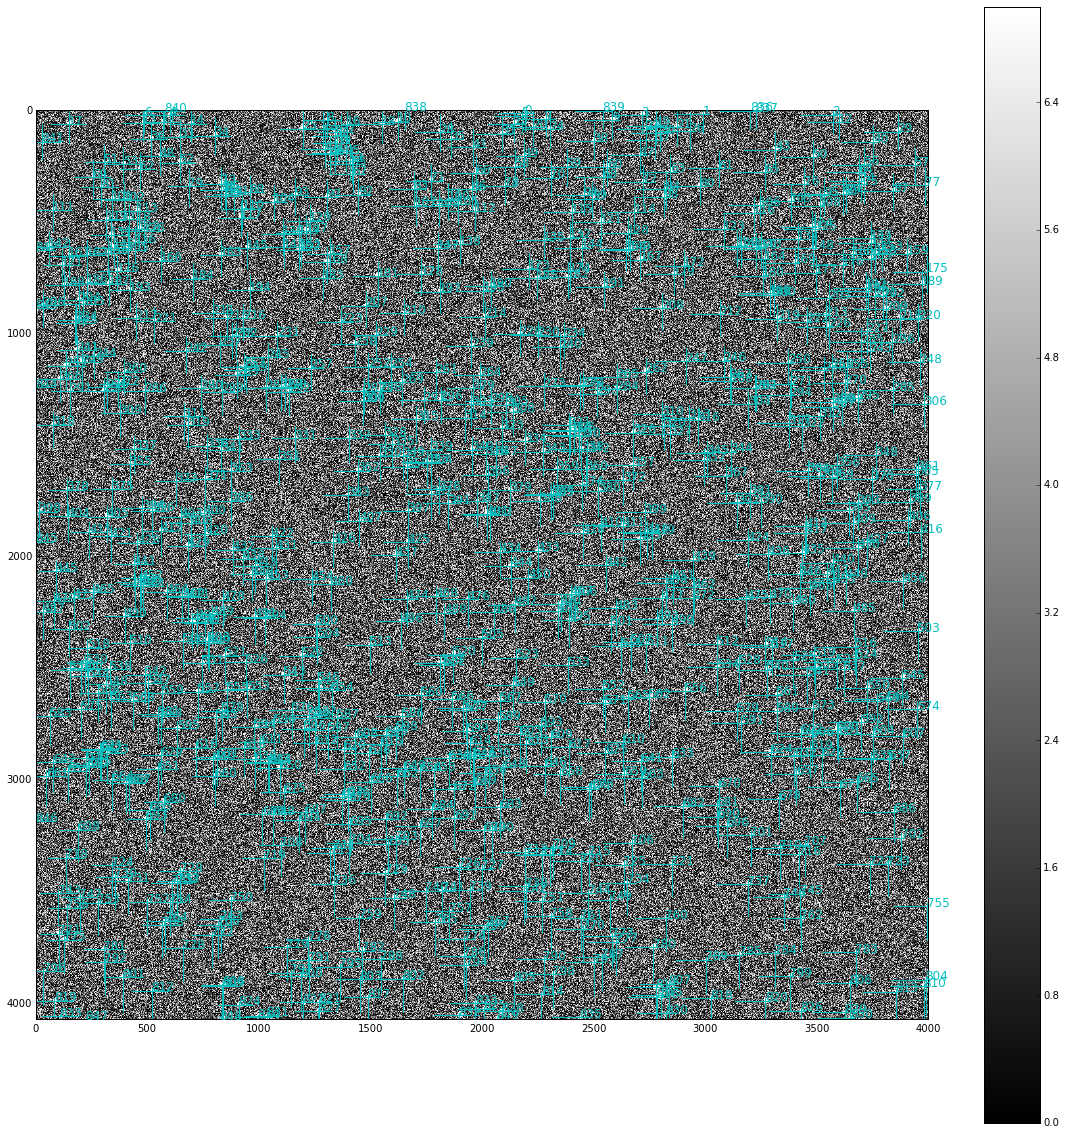

In [12]:
x_max = shape_data[0]
y_max = shape_data[1]

fig = figure(figsize=(20,20))
imshow(data, cmap='gray',vmin=0,vmax=7)
colorbar()

for i in range(len(objects)):
    x = objects_x[i]
    y = objects_y[i]
    
    porc_x = x/float(x_max)
    porc_y = 1-y/float(y_max)
    
    axvline(x,porc_y-0.02,porc_y+0.02,c='c')
    axhline(y,porc_x-0.02,porc_x+0.02,c='c') 
    text(x+1,y+1,str(i),color='c',fontsize=12)
    
#savefig(path_imagenes+'fuentes.png', bbox_inches='tight')
#close()

## Comparacion con las fuentes de la simulacion

In [13]:
#Comparar con los datos de la carpeta src
pha_list_src = fits.open('../../PruebaImagenes/w13_diffim_v11/src/v6866601-fi/R22/S20.fits')
pha_list_src.info()

Filename: ../../PruebaImagenes/w13_diffim_v11/src/v6866601-fi/R22/S20.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       6   ()              
1                BinTableHDU    426   817R x 56C   [59X, 1K, 1D, 1D, 1K, 1D, 1D, 1D, 1D, 1D, 1D, 1E, 1E, 1D, 1D, 1D, 1E, 1E, 1E, 1D, 1D, 1D, 1D, 1E, 1E, 1E, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1J]   
2                BinTableHDU     40   1634R x 7C   [1J, 1J, 1J, 1J, 1J, 64A, 64A]   
3                BinTableHDU    843   18052R x 3C   [1J, 1J, 1J]   
4                BinTableHDU    857   880R x 6C    [1K, 1E, 1E, 1J, 1J, 1E]   


In [14]:
pha_data_src=pha_list_src[1].data
#columnas
print pha_list_src[1].columns

ColDefs(
    name = 'flags'; format = '59X'
    name = 'id'; format = '1K'
    name = 'coord_ra'; format = '1D'
    name = 'coord_dec'; format = '1D'
    name = 'parent'; format = '1K'
    name = 'base_GaussianCentroid_x'; format = '1D'; unit = 'pixels'
    name = 'base_GaussianCentroid_y'; format = '1D'; unit = 'pixels'
    name = 'base_NaiveCentroid_x'; format = '1D'; unit = 'pixels'
    name = 'base_NaiveCentroid_y'; format = '1D'; unit = 'pixels'
    name = 'base_SdssCentroid_x'; format = '1D'; unit = 'pixels'
    name = 'base_SdssCentroid_y'; format = '1D'; unit = 'pixels'
    name = 'base_SdssCentroid_xSigma'; format = '1E'; unit = 'pixels'
    name = 'base_SdssCentroid_ySigma'; format = '1E'; unit = 'pixels'
    name = 'base_SdssShape_xx'; format = '1D'; unit = 'pixels^2'
    name = 'base_SdssShape_yy'; format = '1D'; unit = 'pixels^2'
    name = 'base_SdssShape_xy'; format = '1D'; unit = 'pixels^2'
    name = 'base_SdssShape_xxSigma'; format = '1E'; unit = 'pixels^2'
    name =

In [18]:
x_src=pha_data_src['base_GaussianCentroid_x']
y_src=pha_data_src['base_GaussianCentroid_y']
print len(x_src), len(y_src), max(x_src), max(y_src)
print shape_data[0],shape_data[1]

817 817 3995.65562937 4069.67922387
4072 4000


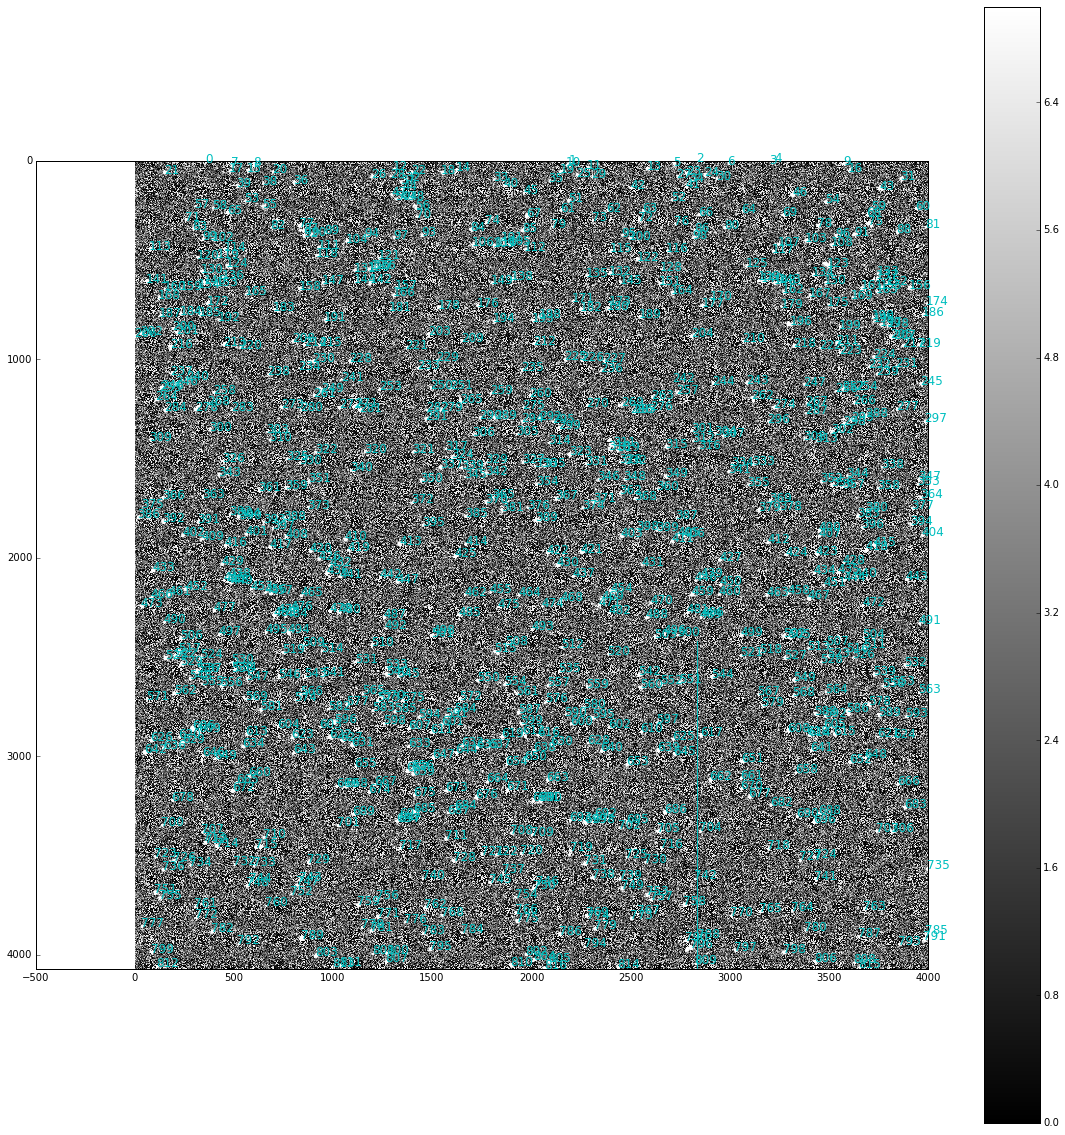

In [24]:
x_max = shape_data[0]
y_max = shape_data[1]

fig_1 = figure(figsize=(20,20))
imshow(data, cmap='gray',vmin=0,vmax=7)
colorbar()

for i in range(len(x_src)):
    x_f = x_src[i]
    y_f = y_src[i]
    
    #porc_x_f = x_f/float(x_max)
    #porc_y_f = 1-y_f/float(y_max)

    axvline(x_f,y_f-0.5,y_f+0.5,c='c')
    axhline(y_f,x_f-0.5,x_f+0.5,c='c') 
    text(x_f+1,y_f+1,str(i),color='c',fontsize=12)
    
#savefig(path_imagenes+'fuentes.png', bbox_inches='tight')
#close()

#Curvas de luz

In [16]:
path = '../../data_marcosmo/aligned/supernova_subtract/'
visitas = sort(os.listdir(path))

num_visitas = len(visitas)

In [20]:
print visitas

['+1.fits' '+3.fits' '-1,2.fits' '-2,2.fits' '-3.fits' '-4.fits' '0.fits']


In [17]:
objects_x_int = array([int(ox) for ox in objects_x])
objects_y_int = array([int(oy) for oy in objects_y])

In [18]:
curvas = zeros((num_objects,num_visitas))

In [23]:
for v in range(num_visitas):
            
    visita = fits.open(path+visitas[v])
    ccd14 = visita[1].data
    ccd14 = ccd14*65000/amax(ccd14) #Normalizando, no estoy segura si debería ir ahi
       
    for i in range(num_objects):
        
        columna = objects_x_int[i]
        fila = objects_y_int[i]
        
        pixel = ccd14[fila][columna]
            
        curvas[i][v] = pixel

    visita.close()

In [25]:
vis = arange(num_visitas)

for i in range(num_objects):
    intensidad = curvas[i][:]
    
    fig = figure(figsize=(20,10))
    scatter(vis,intensidad)
    plot(vis,intensidad,c='c')
    xlabel('Visita',fontsize=20)
    ylabel('Intensidad',fontsize=20)
    xlim(0,num_visitas-1)
    ylim(-amax(intensidad)*0.01,amax(intensidad)*1.01)
    savefig(path_imagenes+'curvas_de_luz/'+str(i)+'.png')
    close()

#Curva sobre fuentes

In [32]:
for i in range(num_objects):

    fila = objects_y_int[i]
    columna = objects_x_int[i]
    
    arreglo_pixel = zeros(23)
    arreglo_intensidad = zeros(23)
    indice_arreglos = 0
    
    if (fila-12 < 0):
        for lin in range(0,fila+11+1):
            pixel = data[lin][columna]
            arreglo_pixel[indice_arreglos] = lin
            arreglo_intensidad[indice_arreglos] = pixel
            indice_arreglos += 1
            
    elif (fila+12 > shape_data[1]):
        for lin in range(fila-11,shape_data[1]):
            pixel = data[lin][columna]
            arreglo_pixel[indice_arreglos] = lin
            arreglo_intensidad[indice_arreglos] = pixel
            indice_arreglos += 1

    else:
        for lin in range(fila-11,fila+11+1):
            pixel = data[lin][columna]
            arreglo_pixel[indice_arreglos] = lin
            arreglo_intensidad[indice_arreglos] = pixel
            indice_arreglos += 1
    
    fig = figure(figsize=(20,10))
    plot(arreglo_pixel,arreglo_intensidad,c='c')
    xlabel('Pixel',fontsize=20)
    ylabel('Intensidad',fontsize=20)
    savefig(path_imagenes+'curvas_sobre_fuentes/'+str(i)+'.png')
    close()